In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Chargement du dataset Iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Ne garder que les caractéristiques petal length et petal width
iris_df = iris_df[['petal length (cm)', 'petal width (cm)', 'species']]

# Affichage des premières lignes du DataFrame pour vérifier
iris_df.head()

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


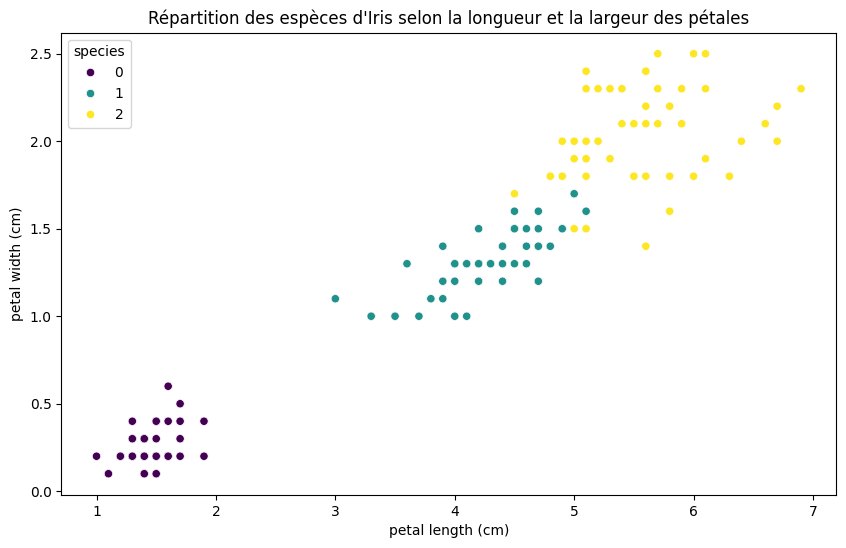

((105, 2), (45, 2), (105,), (45,))

In [5]:
# Visualisation des données
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=iris_df, palette='viridis')
plt.title("Répartition des espèces d'Iris selon la longueur et la largeur des pétales")
plt.show()

# Séparation des données en features (X) et target (y)
X = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher les dimensions des ensembles pour vérifier
X_train.shape, X_test.shape, y_train.shape, y_test.shape


In [2]:
# Chargement du dataset Iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Ne garder que les caractéristiques petal length et petal width
iris_df = iris_df[['petal length (cm)', 'petal width (cm)', 'species']]

# Séparation des données en features (X) et target (y)
X = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle et évaluation des performances pour différentes profondeurs d'arbre
performances = {"max_depth": [], "training_accuracy": [], "test_accuracy": []}

for depth in range(3, 11):
    # Création et entraînement du modèle
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Prédictions sur les ensembles d'entraînement et de test
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)

    # Calcul de l'exactitude (accuracy)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Stockage des performances
    performances['max_depth'].append(depth)
    performances['training_accuracy'].append(train_accuracy)
    performances['test_accuracy'].append(test_accuracy)

# Conversion des performances en DataFrame pour une meilleure visualisation
performances_df = pd.DataFrame(performances)
print(performances_df)

   max_depth  training_accuracy  test_accuracy
0          3           0.961905            1.0
1          4           0.980952            1.0
2          5           0.990476            1.0
3          6           0.990476            1.0
4          7           0.990476            1.0
5          8           0.990476            1.0
6          9           0.990476            1.0
7         10           0.990476            1.0


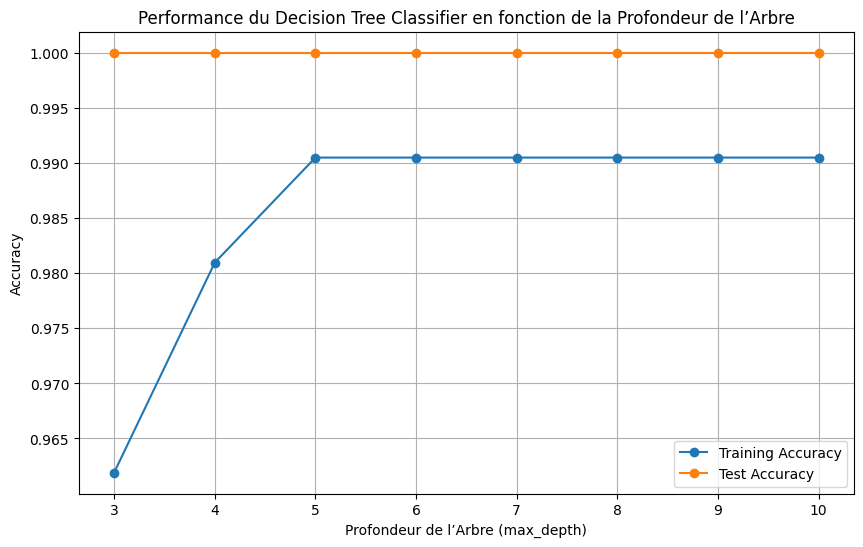

In [6]:
# Données des performances
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
training_accuracy = [0.961905, 0.980952, 0.990476, 0.990476, 0.990476, 0.990476, 0.990476, 0.990476]
test_accuracy = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(max_depth, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(max_depth, test_accuracy, label='Test Accuracy', marker='o')
plt.title('Performance du Decision Tree Classifier en fonction de la Profondeur de l’Arbre')
plt.xlabel('Profondeur de l’Arbre (max_depth)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
